In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
#from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv("./data/mouse_drug_data.csv")
clinical_trail_df = pd.read_csv("./data/clinicaltrial_data.csv")

# Drop Duplicates
mouse_drug_df.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=True)

# Combine the data into a single dataset
drugs_df = pd.merge(clinical_trail_df, mouse_drug_df,on= 'Mouse ID', how= 'left')

# Display the data table for preview
drugs_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_drug_timepoint_mean = drugs_df.groupby(['Drug','Timepoint'], as_index=False)['Tumor Volume (mm3)'].mean()

# Convert to DataFrame

# Preview DataFrame
group_drug_timepoint_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
group_drug_timepoint_sem = drugs_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
SEM = pd.DataFrame(group_drug_timepoint_sem)
SEM.reset_index(inplace=True)

# Preview DataFrame
SEM.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
group_mean_flip = group_drug_timepoint_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
group_mean_flip.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,54.067395,53.170334


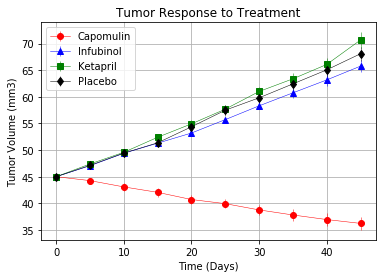

In [5]:
#Capomulin, Infubinol, Ketapril, and Placebo
#Split the MEAN into different DataFrames by drug name
Tumor_size_mean_Capomulin = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Drug'] == 'Capomulin']
Tumor_size_mean_Infubinol = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Drug'] == 'Infubinol']
Tumor_size_mean_Ketapril = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Drug'] == 'Ketapril']
Tumor_size_mean_Placebo = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Drug'] == 'Placebo']

#Split the SEM into different DataFrames by drug name
SEM_Capomulin = SEM.loc[SEM['Drug'] == 'Capomulin']
SEM_Infubinol = SEM.loc[SEM['Drug'] == 'Infubinol']
SEM_Ketapril = SEM.loc[SEM['Drug'] == 'Ketapril']
SEM_Placebo = SEM.loc[SEM['Drug'] == 'Placebo']

# Setting up the plot
fig, ax = plt.subplots()

# Generate the Plot (with Error Bars)
ax.errorbar(Tumor_size_mean_Capomulin['Timepoint'], 
             Tumor_size_mean_Capomulin['Tumor Volume (mm3)'], 
             SEM_Capomulin['Tumor Volume (mm3)'], 
             fmt="ro-", linewidth = .5, label= 'Capomulin')

ax.errorbar(Tumor_size_mean_Infubinol['Timepoint'], 
             Tumor_size_mean_Infubinol['Tumor Volume (mm3)'], 
             SEM_Infubinol['Tumor Volume (mm3)'], 
             fmt="b^-", linewidth = .5, label= 'Infubinol')

ax.errorbar(Tumor_size_mean_Ketapril['Timepoint'], 
             Tumor_size_mean_Ketapril['Tumor Volume (mm3)'], 
             SEM_Ketapril['Tumor Volume (mm3)'], 
             fmt="gs-", linewidth = .5, label= 'Ketapril')

ax.errorbar(Tumor_size_mean_Placebo['Timepoint'], 
             Tumor_size_mean_Placebo['Tumor Volume (mm3)'], 
             SEM_Placebo['Tumor Volume (mm3)'], 
             fmt="kd-", linewidth = .5, label= 'Placebo')

ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Time (Days)')
ax.set_title('Tumor Response to Treatment')
plt.grid()
plt.legend(loc='best')

# Save the Figure
plt.savefig('./Images/Pyma_Tumor_Volume')
plt.show()



## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_drug_timepoint_Meta = drugs_df.groupby(['Drug','Timepoint'], as_index=False)['Metastatic Sites'].mean()

# Convert to DataFrame
#Metastatic_Avg_df = pd.DataFrame(group_drug_timepoint_Meta)

# Preview DataFrame
#Metastatic_Avg_df.head()
group_drug_timepoint_Meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group_drug_timepoint_sem_meta = drugs_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
SEM_Meta = pd.DataFrame(group_drug_timepoint_sem_meta)
SEM_Meta.reset_index(inplace=True)

# Preview DataFrame
SEM_Meta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
SEM_Meta_flip = SEM_Meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
SEM_Meta_flip

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


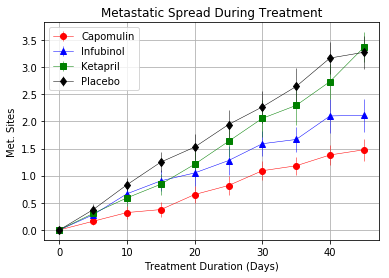

In [9]:
#Capomulin, Infubinol, Ketapril, and Placebo
#Split the MEAN into different DataFrames by drug name
Meta_mean_Capomulin = group_drug_timepoint_Meta.loc[group_drug_timepoint_Meta['Drug'] == 'Capomulin']
Meta_mean_Infubinol = group_drug_timepoint_Meta.loc[group_drug_timepoint_Meta['Drug'] == 'Infubinol']
Meta_mean_Ketapril = group_drug_timepoint_Meta.loc[group_drug_timepoint_Meta['Drug'] == 'Ketapril']
Meta_mean_Placebo = group_drug_timepoint_Meta.loc[group_drug_timepoint_Meta['Drug'] == 'Placebo']

#Split the SEM into different DataFrames by drug name
SEM_Meta_Capomulin = SEM_Meta.loc[SEM['Drug'] == 'Capomulin']
SEM_Meta_Infubinol = SEM_Meta.loc[SEM['Drug'] == 'Infubinol']
SEM_Meta_Ketapril = SEM_Meta.loc[SEM['Drug'] == 'Ketapril']
SEM_Meta_Placebo = SEM_Meta.loc[SEM['Drug'] == 'Placebo']

# Setting up the plot
fig, ax1 = plt.subplots()

# Generate the Plot (with Error Bars)
ax1.errorbar(Meta_mean_Capomulin['Timepoint'], 
             Meta_mean_Capomulin['Metastatic Sites'], 
             SEM_Meta_Capomulin['Metastatic Sites'], 
             fmt="ro-", linewidth = .5, label= 'Capomulin')

ax1.errorbar(Meta_mean_Infubinol['Timepoint'], 
             Meta_mean_Infubinol['Metastatic Sites'], 
             SEM_Meta_Infubinol['Metastatic Sites'], 
             fmt="b^-", linewidth = .5, label= 'Infubinol')

ax1.errorbar(Meta_mean_Ketapril['Timepoint'], 
             Meta_mean_Ketapril['Metastatic Sites'], 
             SEM_Meta_Ketapril['Metastatic Sites'], 
             fmt="gs-", linewidth = .5, label= 'Ketapril')

ax1.errorbar(Meta_mean_Placebo['Timepoint'], 
             Meta_mean_Placebo['Metastatic Sites'], 
             SEM_Meta_Placebo['Metastatic Sites'], 
             fmt="kd-", linewidth = .5, label= 'Placebo')

ax1.set_ylabel('Met. Sites')
ax1.set_xlabel('Treatment Duration (Days)')
ax1.set_title('Metastatic Spread During Treatment')
plt.grid()
plt.legend(loc='best')

# Save the Figure
plt.savefig('./Images/Pyma_Metastatic_Spread')

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_drug_timepoint_mice = drugs_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
Mice_Count_df = pd.DataFrame(group_drug_timepoint_mice)
Mice_Count_df.reset_index(inplace= True)
Mice_Count_df.rename(columns= {'Mouse ID':'Mouse Count'},inplace=True)

# Preview DataFrame
Mice_Count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
Mice_df_flip = Mice_Count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
Mice_df_flip

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,26,25
5,25,21,25,23,23,24,23,25,25,24
10,25,20,21,22,21,24,21,24,23,22
15,24,19,21,19,21,20,15,24,23,21
20,23,18,20,19,20,19,15,23,21,17
25,22,18,18,19,18,17,13,23,19,16
30,22,16,17,18,15,15,12,23,18,15
35,22,14,12,17,15,14,9,21,16,14
40,21,14,10,15,15,12,9,20,12,14


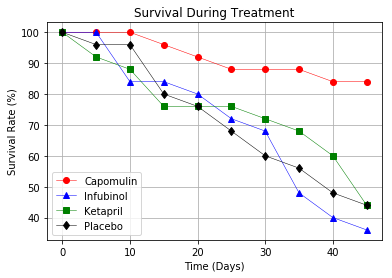

In [12]:
#Capomulin, Infubinol, Ketapril, and Placebo
#Split the MEAN into different DataFrames by drug name
Mice_Count_Capomulin = Mice_Count_df.loc[Mice_Count_df['Drug'] == 'Capomulin']
Mice_Count_Capomulin['Survival Rate'] = (Mice_Count_Capomulin['Mouse Count']/Mice_Count_Capomulin['Mouse Count'].max())*100

Mice_Count_Infubinol = Mice_Count_df.loc[Mice_Count_df['Drug'] == 'Infubinol']
Mice_Count_Infubinol['Survival Rate'] = (Mice_Count_Infubinol['Mouse Count']/Mice_Count_Infubinol['Mouse Count'].max())*100

Mice_Count_Ketapril = Mice_Count_df.loc[Mice_Count_df['Drug'] == 'Ketapril']
Mice_Count_Ketapril['Survival Rate'] = (Mice_Count_Ketapril['Mouse Count']/Mice_Count_Ketapril['Mouse Count'].max())*100

Mice_Count_Placebo = Mice_Count_df.loc[Mice_Count_df['Drug'] == 'Placebo']
Mice_Count_Placebo['Survival Rate'] = (Mice_Count_Placebo['Mouse Count']/Mice_Count_Placebo['Mouse Count'].max())*100

# Generate the Plot (Accounting for percentages)
plt.plot(Mice_Count_Capomulin['Timepoint'], Mice_Count_Capomulin['Survival Rate'], 
         label= 'Capomulin', marker='o', color= 'r', linestyle= '-', linewidth= .5)

plt.plot(Mice_Count_Infubinol['Timepoint'], Mice_Count_Infubinol['Survival Rate'], 
         label= 'Infubinol', marker='^', color= 'b', linestyle= '-', linewidth= .5)

plt.plot(Mice_Count_Ketapril['Timepoint'], Mice_Count_Ketapril['Survival Rate'], 
         label= 'Ketapril', marker='s', color= 'g', linestyle= '-', linewidth= .5)

plt.plot(Mice_Count_Placebo['Timepoint'], Mice_Count_Placebo['Survival Rate'], 
         label= 'Placebo', marker='d', color= 'black', linestyle= '-', linewidth= .5)

plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend(loc='best')

# Save the Figure
plt.savefig('./Images/Pyma_Survival_Rate')

# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Create a data frame with the initial measurement and last measurement 
End_time = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Timepoint'] == 45] 
Start_time = group_drug_timepoint_mean.loc[group_drug_timepoint_mean['Timepoint'] == 0] 
del Start_time['Timepoint']
del End_time['Timepoint']
df = pd.merge(Start_time,End_time,on='Drug',how='outer',suffixes=['_Start','_End'])

df

,Drug,Tumor Volume (mm3)_Start,Tumor Volume (mm3)_End
0,Capomulin,45.0,36.236114
1,Ceftamin,45.0,64.132421
2,Infubinol,45.0,65.755562
3,Ketapril,45.0,70.662958
4,Naftisol,45.0,69.265506
5,Placebo,45.0,68.084082
6,Propriva,45.0,66.258529
7,Ramicane,45.0,34.955595
8,Stelasyn,45.0,68.438310
9,Zoniferol,45.0,65.960888


In [20]:
# Calculate % Change
df['Change'] = ((df['Tumor Volume (mm3)_End'] - df['Tumor Volume (mm3)_Start']) / df['Tumor Volume (mm3)_Start'])*100
del df['Tumor Volume (mm3)_End']
del df['Tumor Volume (mm3)_Start']

# Display the data to confirm
df

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [18]:
# Splice the data between passing and failing drugs
df.sort_values(by='Change',inplace=True)
df['Change'] = df['Change'].astype(int)
df.reset_index(inplace=True)
df

,index,Drug,Change
0,7,Ramicane,-22
1,0,Capomulin,-19
2,1,Ceftamin,42
3,2,Infubinol,46
4,9,Zoniferol,46
5,6,Propriva,47
6,5,Placebo,51
7,8,Stelasyn,52
8,4,Naftisol,53
9,3,Ketapril,57


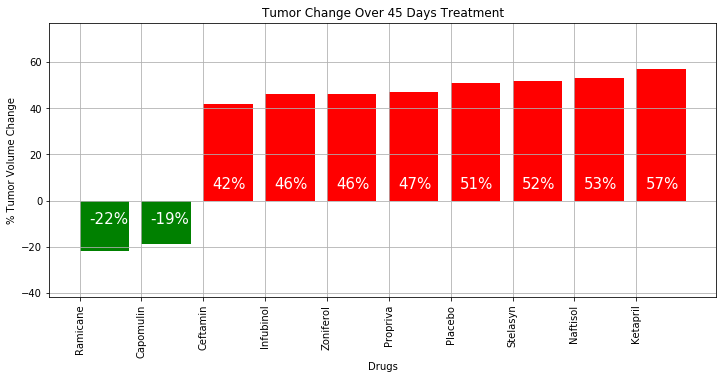

In [16]:
#Assign fig size to account for the plot
plt.figure(figsize=(10,5))

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(df))
df['colors'] ='g'
df.loc[df.Change>0,'colors']='r'
plt.bar(x_axis,df['Change'],color= df['colors'],align='edge')
plt.xticks(x_axis ,df['Drug'], rotation = 'vertical')
plt.tight_layout()
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylim(min(df['Change'])-20,max(df['Change'])+20)
plt.grid()

# Label the percentages of changes
for i, v in enumerate(df['Change']):
    if df['Change'][i] > 0:
        plt.text(i+.15, 5, f'{df["Change"][i]}%', fontsize=15, color='white')
    else:
        plt.text(i+.15, -10, f'{df["Change"][i]}%', fontsize=15, color='white')

# Save the Figure
plt.savefig('./Images/Pyma_Percent_Change_Tumor')

# Show the Figure
fig.show()